#Importing Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import warnings
import graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Import the necessary module
from sklearn import tree
# Suppress warnings
warnings.filterwarnings('ignore')



In [ ]:
#Loading the data set
data=pd.read_csv("Total.csv")

#Displaying the first few rows
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Column indexes from the data frame
#Data type: categorical, continuous
def get_column_indexes(in_df, column_type):
    # Identify continuous columns
    num_column_names = list(in_df.select_dtypes(include=['number']).columns)

    column_indexes = []

    ############ Code to identify boolean variables #####################
    bool_col_indexes = []

    bool_col_names = []

    # Check each numeric column for boolean {0, 1} values
    for col in num_column_names[:]:
        unique_values = set(in_df[col].dropna().unique())
        if unique_values == {0, 1}:
            bool_col_indexes.append(in_df.columns.get_loc(col))
            # Keeping only the numerical variables in the list
            num_column_names.remove(col)

    bool_col_names = in_df.columns[bool_col_indexes]
    ####################################################################

    if(column_type == "categorical"):
        # Identify categorical columns
        column_names = in_df.select_dtypes(include=['object', 'category']).columns
        column_indexes = bool_col_indexes
        print("Identified", column_type, "columns:", list(column_names) + list(bool_col_names))

    elif(column_type == "continuous"):
        column_names = num_column_names
        print("Identified", column_type, "columns:", column_names)

    for col in column_names:
        column_indexes.append(in_df.columns.get_loc(col))

    print("Indexes of", column_type, "columns:", column_indexes)
    return column_indexes


##Descriptive statistic of continuous data and cleaning the data

In [ ]:
 # evaluate descriptive statistics for continuous data

continuous_data_column_indexes = get_column_indexes(data, "continuous")

# Evaluate descriptive statistics for continuous data
continuous_data = data.iloc[:, continuous_data_column_indexes]
print("\nDescriptive statistics for continuous data:")
print(continuous_data.describe())

# Clean the data for missing values and outliers
# Missing values can be imputed using various techniques like mean, median, or mode
# Outliers can be treated by winsorizing or replacing with mean/median

# Impute missing values with the median
continuous_data = continuous_data.fillna(continuous_data.median())

# Winsorize outliers
for col in continuous_data.columns:
  Q1 = continuous_data[col].quantile(0.25)
  Q3 = continuous_data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  continuous_data[col] = continuous_data[col].clip(lower_bound, upper_bound)

# Evaluate descriptive statistics for continuous data after cleaning
print("\nDescriptive statistics for continuous data after cleaning:")
print(continuous_data.describe())

Identified continuous columns: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']
Indexes of continuous columns: [0, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20]

Descriptive statistics for continuous data:
       battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000    

##Descriptive statistic of categorical data and cleaning the data

In [ ]:
# Call the function to get categorical column indexes
categorical_column_indexes = get_column_indexes(data, "categorical")

# Evaluate descriptive statistics for categorical data
categorical_data = data.iloc[:, categorical_column_indexes]
print("\nDescriptive statistics for categorical data:")
print(categorical_data.describe())

#evaluate descriptive statistics for categorical data
# #also clean the data

# Evaluate descriptive statistics for categorical data
categorical_data = data.iloc[:, categorical_column_indexes]
print("\nDescriptive statistics for categorical data:")
print(categorical_data.describe())

# Clean the categorical data
# Missing values can be imputed using the mode
# Outliers can be treated by replacing with the mode

# Impute missing values with the mode
categorical_data = categorical_data.fillna(categorical_data.mode().iloc[0])

# Replace outliers with the mode
for col in categorical_data.columns:
  categorical_data[col] = categorical_data[col].replace(to_replace=categorical_data[col].value_counts().index[-1],
                                                    value=categorical_data[col].mode().iloc[0])

# Evaluate descriptive statistics for categorical data after cleaning
print("\nDescriptive statistics for categorical data after cleaning:")
print(categorical_data.describe())

Identified categorical columns: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
Indexes of categorical columns: [1, 3, 5, 17, 18, 19]

Descriptive statistics for categorical data:
            blue     dual_sim       four_g      three_g  touch_screen  \
count  2000.0000  2000.000000  2000.000000  2000.000000   2000.000000   
mean      0.4950     0.509500     0.521500     0.761500      0.503000   
std       0.5001     0.500035     0.499662     0.426273      0.500116   
min       0.0000     0.000000     0.000000     0.000000      0.000000   
25%       0.0000     0.000000     0.000000     1.000000      0.000000   
50%       0.0000     1.000000     1.000000     1.000000      1.000000   
75%       1.0000     1.000000     1.000000     1.000000      1.000000   
max       1.0000     1.000000     1.000000     1.000000      1.000000   

              wifi  
count  2000.000000  
mean      0.507000  
std       0.500076  
min       0.000000  
25%       0.000000  
50%       1.000000

## Distribution of Categorical data

Identified categorical columns: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
Indexes of categorical columns: [1, 3, 5, 17, 18, 19]


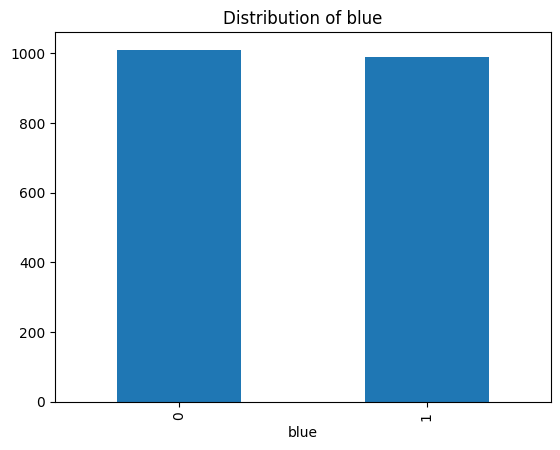

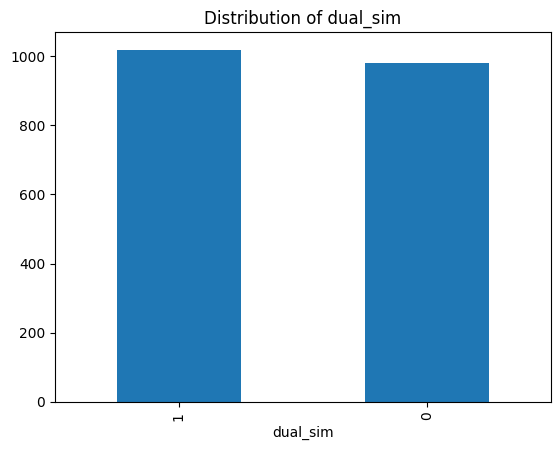

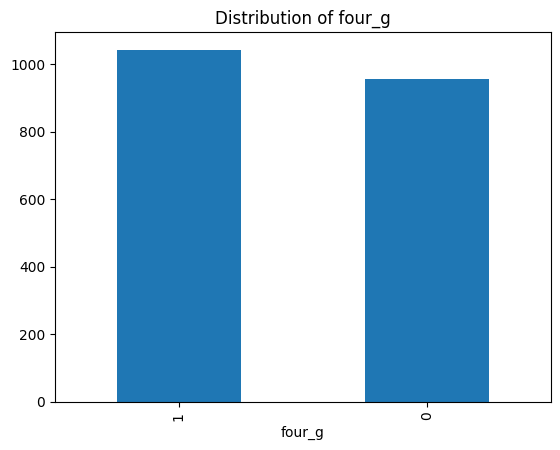

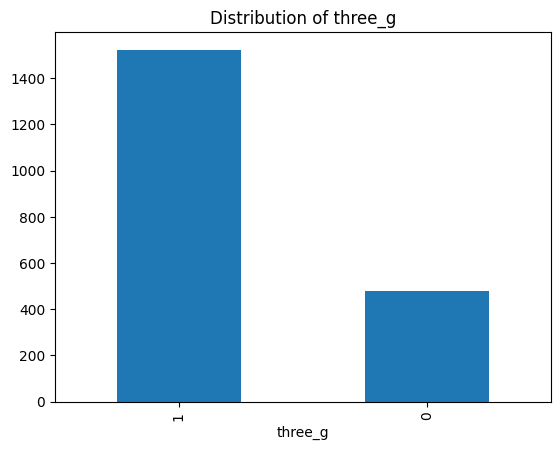

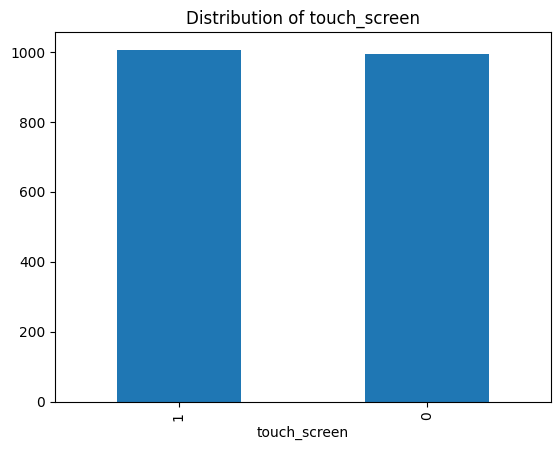

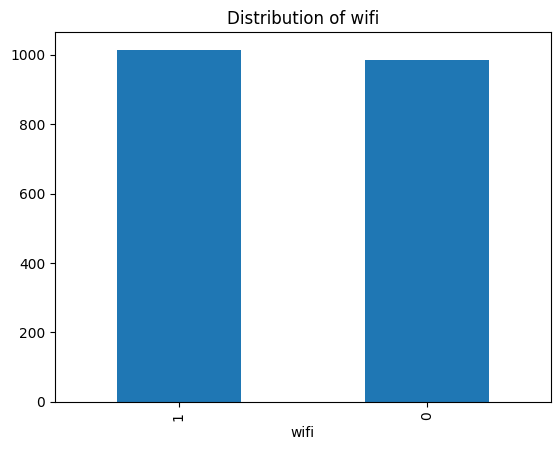

In [ ]:
#Creating a graph describing the distribution for each variable in the categorical data in different

import matplotlib.pyplot as plt
# Identify categorical columns
categorical_column_indexes = get_column_indexes(data, "categorical")

# Loop through each categorical column
for i in categorical_column_indexes:
    # Get the column name
    column_name = data.columns[i]

    # Create a new figure
    plt.figure()

    # Plot the distribution of the categorical variable
    data[column_name].value_counts().plot(kind="bar")

    # Set the title of the figure
    plt.title("Distribution of " + column_name)

    # Show the figure
    plt.show()


#Distribution of continuous Data

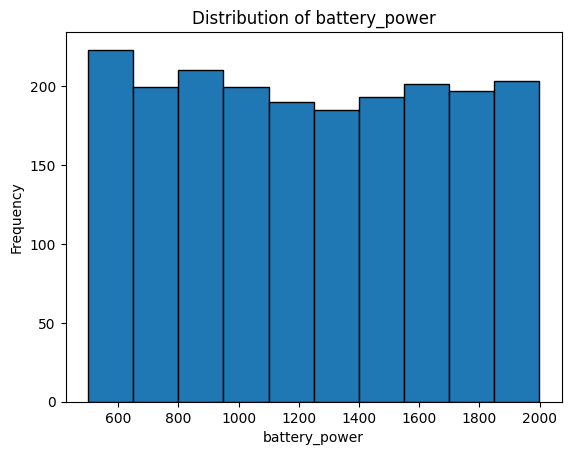

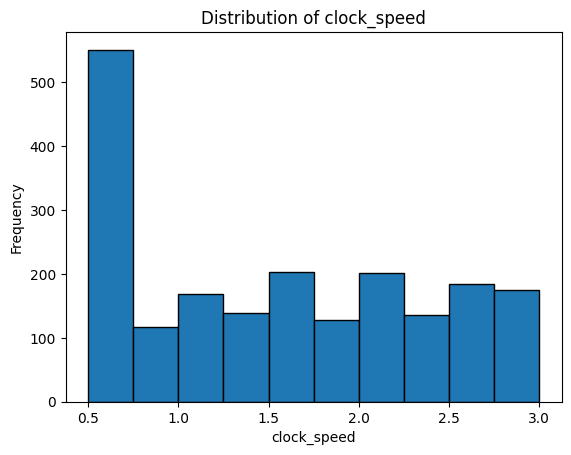

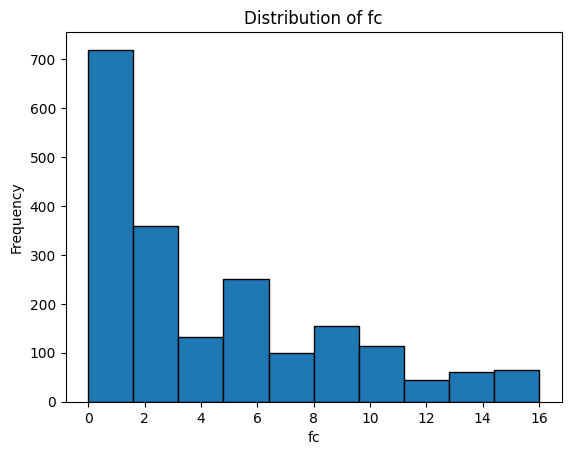

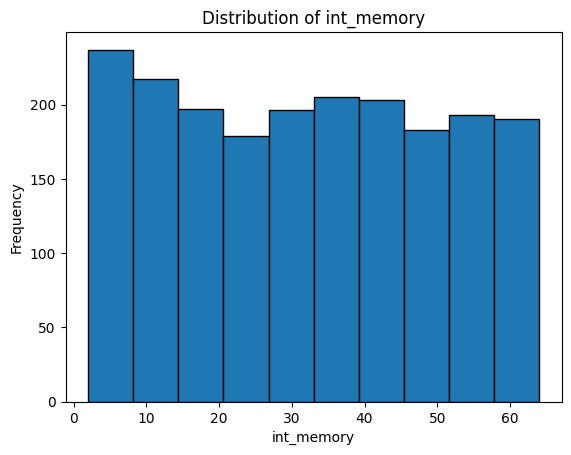

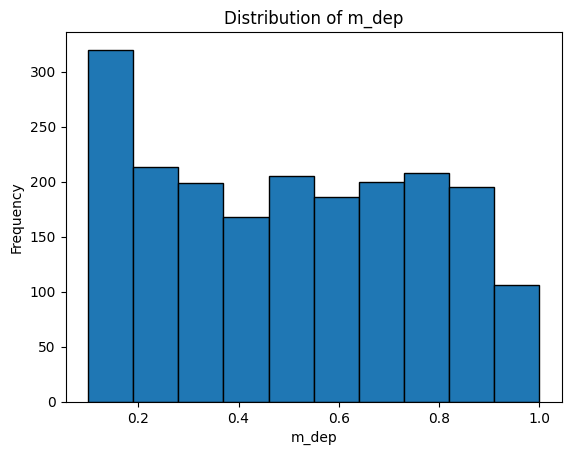

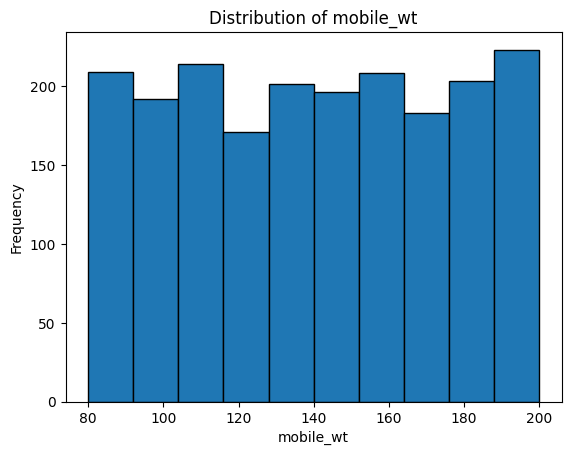

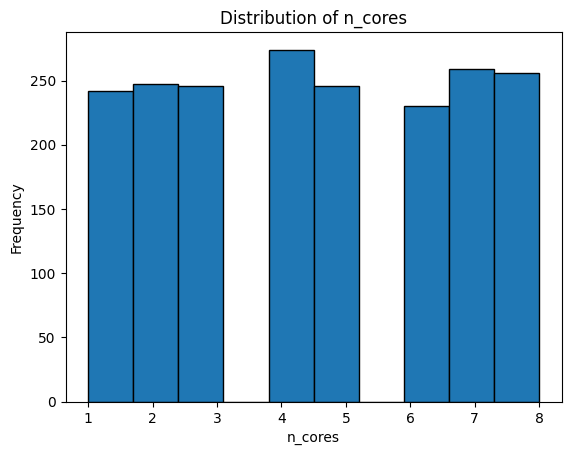

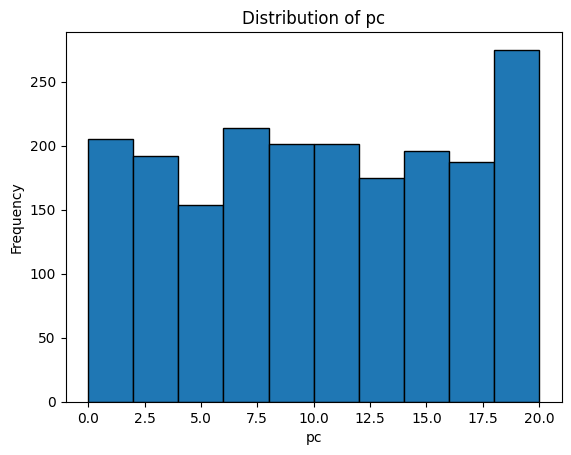

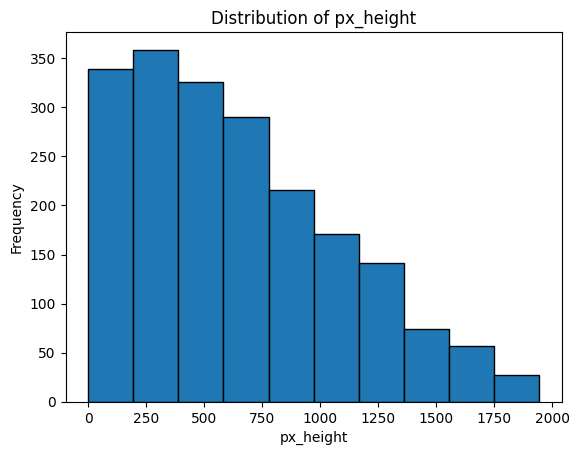

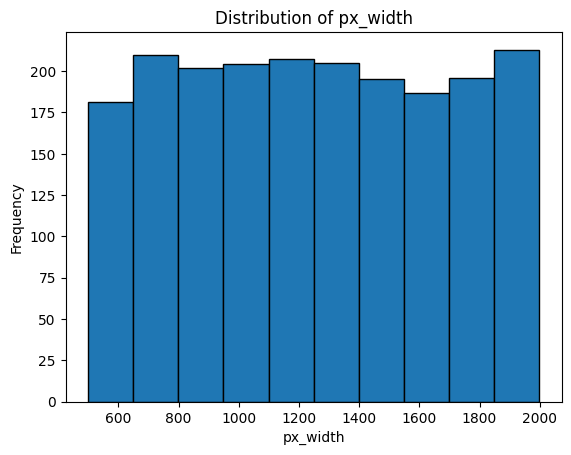

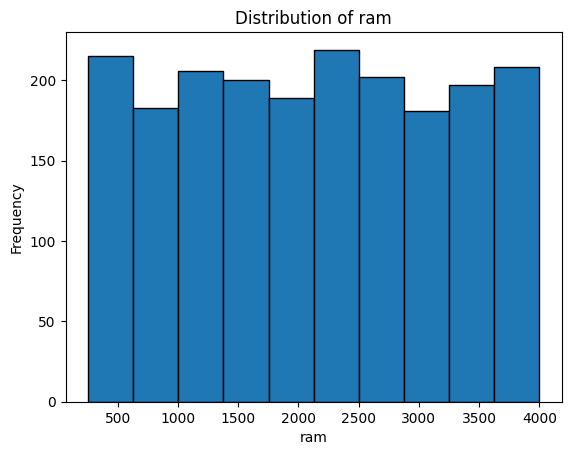

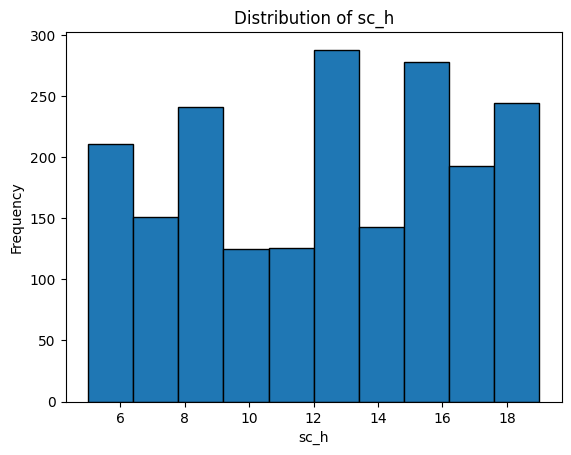

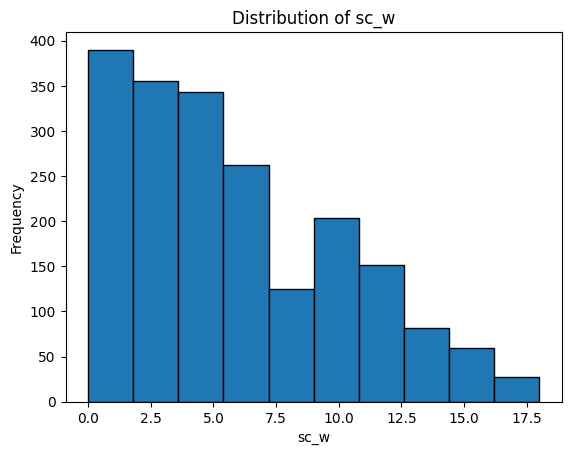

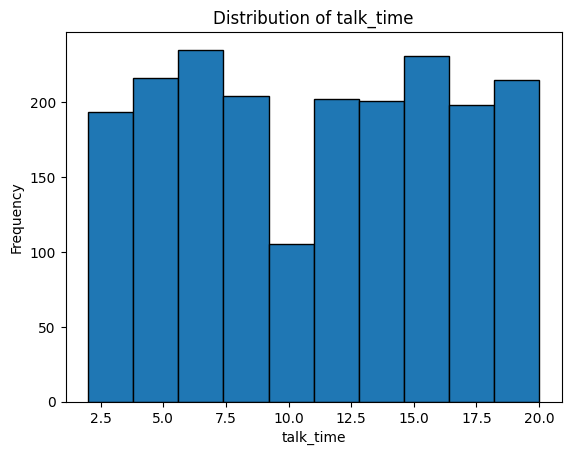

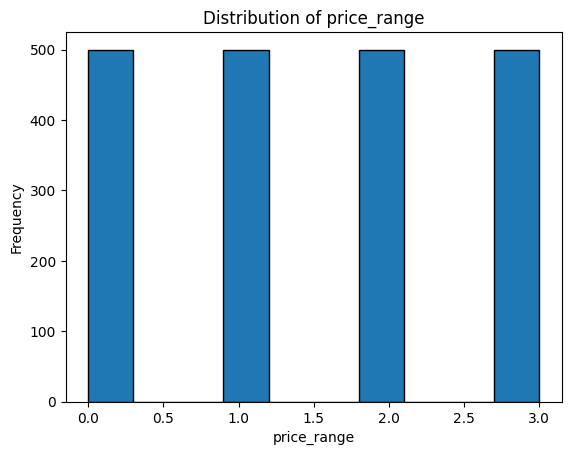

In [ ]:
#Creating a graph describing the distribution for each variable in the continuous data

import matplotlib.pyplot as plt

for col in continuous_data.columns:
  plt.hist(continuous_data[col], bins=10, edgecolor="black")
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()


##Saving the data

In [ ]:
 #combine continuous and categorical data and ready for export

# Combine continuous and categorical data
combined_data = pd.concat([continuous_data, categorical_data], axis=1)

combined_data
#saving the data
combined_data.to_csv("processed_Total.csv")

##Evaluation function

In [ ]:

def evaluation_function(y, yhat):
    ei = y - yhat

    ei2 = ei ** 2

    MSE = ei2.mean()
    RMSE = MSE ** 0.5

    ei_abs = ei.abs()
    MAE = ei_abs.mean()

    SSR = ((yhat - y.mean())**2).sum()
    SSE = ei2.sum()
    SST = ((y - y.mean())**2).sum()
    R2 = 1 - (SSE/SST)

    print("MSE: ", MSE)
    print("RMSE: ", RMSE)
    print("MAE: ", MAE)
    print("R^2: ", R2)

## Feature importance

In [ ]:
# Load the dataset
data = pd.read_csv("Cleaned_data.csv")

# Separate features and target variable
X = data.drop(columns=['Unnamed: 0', 'price_range'])
y = data['price_range']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Create a DataFrame for the normalized features
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
# Calculate the correlation of each feature with the target variable
correlation = X_normalized_df.corrwith(y)

# Create a DataFrame to display the importance of each feature
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': correlation.abs()
}).sort_values(by='Importance', ascending=False)


print(feature_importance_df)

                     Feature  Importance
ram                      ram    0.917046
battery_power  battery_power    0.200723
px_width            px_width    0.165818
px_height          px_height    0.148852
int_memory        int_memory    0.044435
sc_w                    sc_w    0.038711
pc                        pc    0.033599
touch_screen    touch_screen    0.030411
mobile_wt          mobile_wt    0.030302
three_g              three_g    0.023611
sc_h                    sc_h    0.022986
fc                        fc    0.022491
talk_time          talk_time    0.021859
blue                    blue    0.020573
wifi                    wifi    0.018785
dual_sim            dual_sim    0.017444
four_g                four_g    0.014772
clock_speed      clock_speed    0.006606
n_cores              n_cores    0.004399
m_dep                  m_dep    0.000853


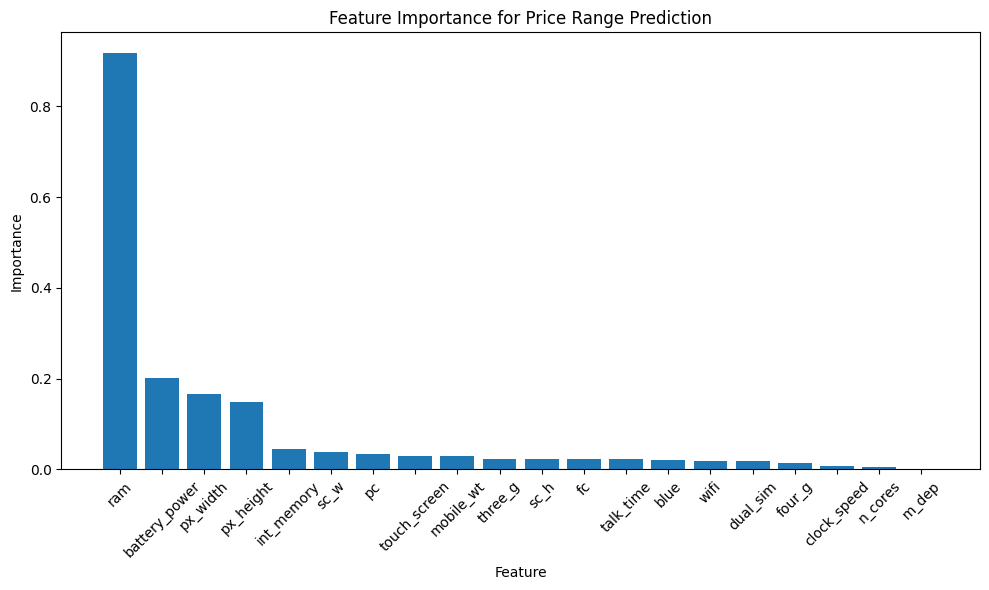

In [ ]:
# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Price Range Prediction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data cleaning

In [ ]:

# Load the dataset
data=pd.read_csv("Cleaned_data.csv")

# defining features and target variable
X = data.drop(columns=['Unnamed: 0', 'price_range'])
y = data['price_range']

# Normalizing the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)




MLP training Model Evaluation:
MSE:  0.0
RMSE:  0.0
MAE:  0.0
R^2:  1.0
MLP testing Model Evaluation:
MSE:  0.055
RMSE:  0.2345207879911715
MAE:  0.055
R^2:  0.9587781467966404


##MLP models

In [ ]:
# Spliting the  the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Training  the MLP model
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train, y_train)

# Predicing  the MLP model
mlp_predictions = mlp_model.predict(X_test)
mlp_tain=mlp_model.predict(X_train)

# Evaluation the MLP model
print("MLP training Model Evaluation:")
evaluation_function(y_train, mlp_tain)
print("MLP testing Model Evaluation:")
evaluation_function(y_test, mlp_predictions)



## Descriptive analysis

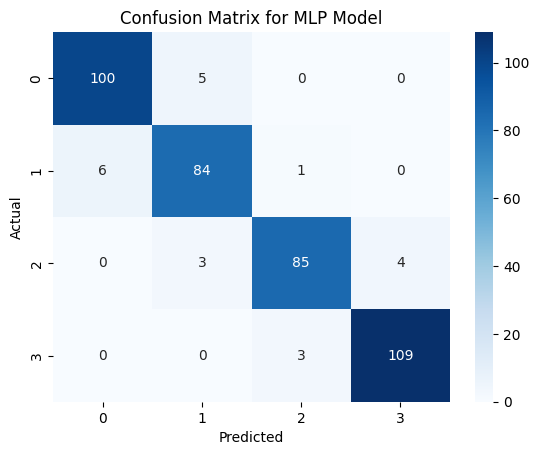

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, mlp_predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the labels for the axes
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title of the plot
plt.title("Confusion Matrix for MLP Model")

# Show the plot
plt.show()


In [ ]:
# For example, the element in the first row and first column of the matrix shows that the model correctly predicted 100 instances of the first class.
# The element in the second row and third column of the matrix shows that the model incorrectly predicted 5 instances of the second class as the third class.


#MLP with top 5 feature

In [ ]:
# with top 5 features
top_features = ['ram', 'battery_power', 'px_height', 'px_width', 'talk_time']
X_top = data[top_features]
X_top_normalized = scaler.fit_transform(X_top)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_normalized, y, test_size=0.2, random_state=42)

# MLP with Top Features
mlp_model_top = MLPClassifier(random_state=42, max_iter=300)
mlp_model_top.fit(X_train_top, y_train_top)
mlp_predictions_top = mlp_model_top.predict(X_test_top)
mlp_tain_top=mlp_model_top.predict(X_train_top)

print("MLP (Top Features) training Model Evaluation:")
evaluation_function(y_train_top, mlp_tain_top)
print("MLP (Top Features) Evaluation:")
evaluation_function(y_test_top, mlp_predictions_top)

MLP (Top Features) training Model Evaluation:
MSE:  0.03
RMSE:  0.17320508075688773
MAE:  0.03
R^2:  0.975584004852679
MLP (Top Features) Evaluation:
MSE:  0.035
RMSE:  0.18708286933869708
MAE:  0.035
R^2:  0.9737679115978621


#MLP with piecewise classification

In [ ]:
region_1 = (X_top['ram'] <= 0.5)
region_2 = (X_top['ram'] > 0.5) & (X_top['ram'] <= 1.5)
region_3 = (X_top['ram'] > 1.5)

#boolean masks for training and testing sets separately
train_region_1 = (X_train_top[:, 0] <= 0.5)
train_region_2 = (X_train_top[:, 0] > 0.5) & (X_train_top[:, 0] <= 1.5)
train_region_3 = (X_train_top[:, 0] > 1.5)

test_region_1 = (X_test_top[:, 0] <= 0.5)
test_region_2 = (X_test_top[:, 0] > 0.5) & (X_test_top[:, 0] <= 1.5)
test_region_3 = (X_test_top[:, 0] > 1.5)

# Spliting the data into these regions for training
X_train_1, y_train_1 = X_train_top[train_region_1], y_train_top[train_region_1]
X_train_2, y_train_2 = X_train_top[train_region_2], y_train_top[train_region_2]
X_train_3, y_train_3 = X_train_top[train_region_3], y_train_top[train_region_3]

# Spliting the data into these regions for testing
X_test_1, y_test_1 = X_test_top[test_region_1], y_test_top[test_region_1]
X_test_2, y_test_2 = X_test_top[test_region_2], y_test_top[test_region_2]
X_test_3, y_test_3 = X_test_top[test_region_3], y_test_top[test_region_3]

def piecewise_mlp_model(X):
  ram = X[:, 0]

  region_1 = (ram <= 0.5)
  region_2 = (ram > 0.5) & (ram <= 1.5)
  region_3 = (ram > 1.5)

  mlp_model_1 = MLPClassifier(random_state=42, max_iter=300)
  mlp_model_2 = MLPClassifier(random_state=42, max_iter=300)
  mlp_model_3 = MLPClassifier(random_state=42, max_iter=300)

  mlp_model_1.fit(X_train_1, y_train_1)
  mlp_model_2.fit(X_train_2, y_train_2)
  mlp_model_3.fit(X_train_3, y_train_3)

  predictions = np.zeros_like(ram)

  predictions[region_1] = mlp_model_1.predict(X[region_1])
  predictions[region_2] = mlp_model_2.predict(X[region_2])
  predictions[region_3] = mlp_model_3.predict(X[region_3])

  return predictions

piecewise_mlp_predictions = piecewise_mlp_model(X_test_top)
piecewise_mlp_model=piecewise_mlp_model(X_train_top)

print("evaluation of MLP training data")
evaluation_function(y_train_top, piecewise_mlp_model)

print("Evaluation of MLP testing data")
evaluation_function(y_test_top, piecewise_mlp_predictions)




evaluation of MLP training data
MSE:  0.028125
RMSE:  0.16770509831248423
MAE:  0.028125
R^2:  0.9771100045493866
Evaluation of MLP testing data
MSE:  0.0425
RMSE:  0.20615528128088303
MAE:  0.0425
R^2:  0.968146749797404


#Decision Tree model

In [ ]:
# Create a decision tree regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the decision tree model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the decision tree model
print("Decision tree training Model Evaluation:")
evaluation_function(y_train, decision_tree_model.predict(X_train))
print("Decision tree testing Model Evaluation:")
evaluation_function(y_test, decision_tree_predictions)


Decision tree training Model Evaluation:
MSE:  0.0
RMSE:  0.0
MAE:  0.0
R^2:  1.0
Decision tree testing Model Evaluation:
MSE:  0.1475
RMSE:  0.3840572873934304
MAE:  0.1475
R^2:  0.8894504845909902


#Plotting of decision tree

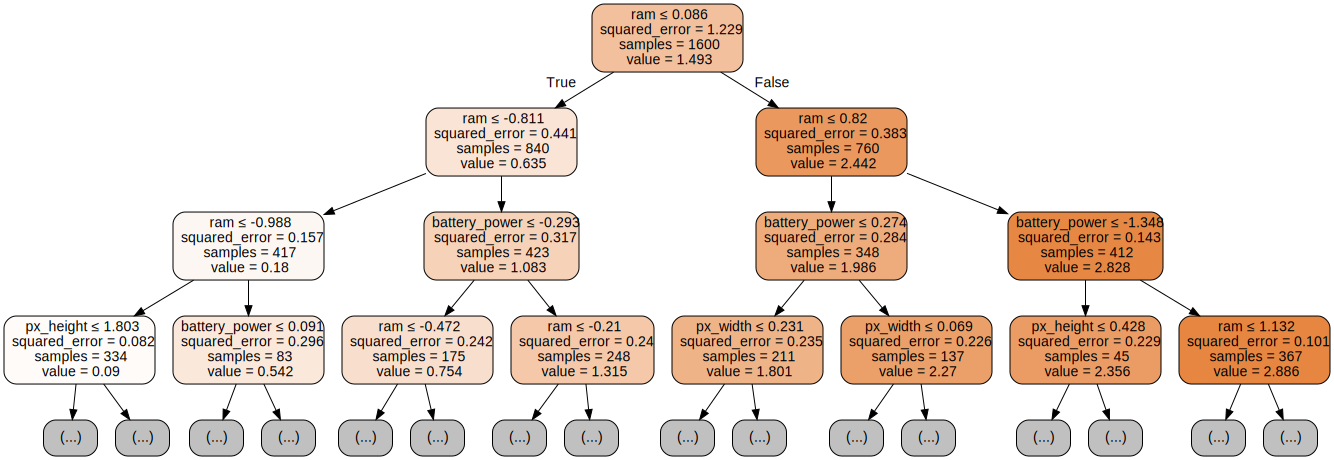

In [ ]:
#DOT data for the decision tree
dot_data = tree.export_graphviz(
    decision_tree_model,  # Use the trained decision tree model
    feature_names=X.columns,
    class_names=['0', '1', '2', '3'],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3
)

# Creating a graph object from the DOT data
graph = graphviz.Source(dot_data)

# Display of graph
graph

#Decision Tree with top 5 features

Decision tree (Top Features) training Model Evaluation:
MSE:  0.0
RMSE:  0.0
MAE:  0.0
R^2:  1.0
Decision tree (Top Features) Evaluation:
MSE:  0.1225
RMSE:  0.35
MAE:  0.1225
R^2:  0.9081876905925172


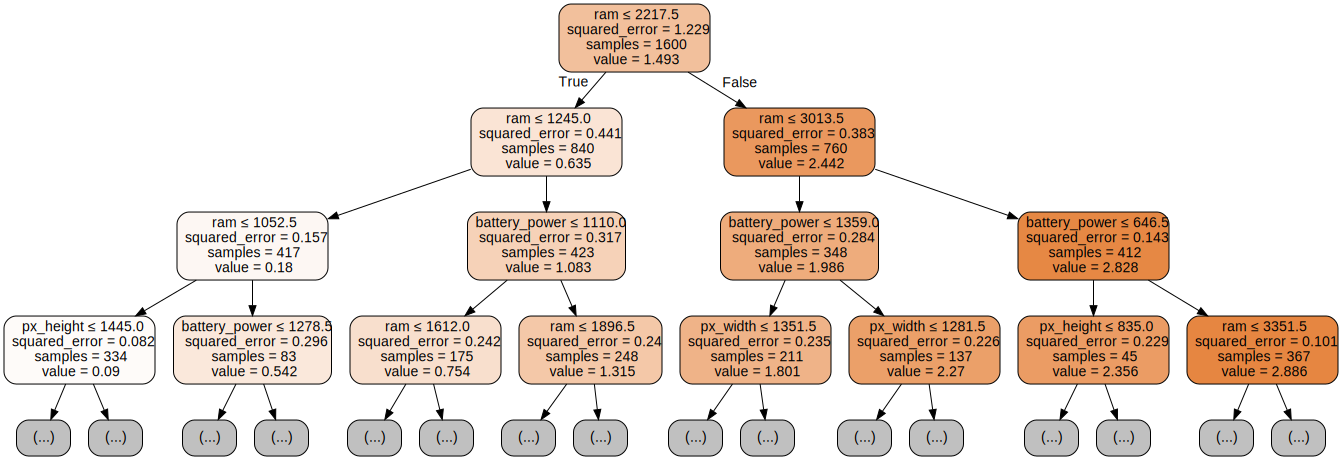

In [ ]:
# Decision tree with top 5 features
top_features = ['ram', 'battery_power', 'px_height', 'px_width', 'talk_time']
X_top = data[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
decision_tree_model_top = DecisionTreeRegressor(random_state=42)

# Train the decision tree model
decision_tree_model_top.fit(X_train_top, y_train_top)

# Make predictions on the test set
decision_tree_predictions_top = decision_tree_model_top.predict(X_test_top)

# Evaluate the decision tree model
print("Decision tree (Top Features) training Model Evaluation:")
evaluation_function(y_train_top, decision_tree_model_top.predict(X_train_top))
print("Decision tree (Top Features) Evaluation:")
evaluation_function(y_test_top, decision_tree_predictions_top)

# Plot the decision tree
dot_data = tree.export_graphviz(
    decision_tree_model_top,
    feature_names=X_top.columns,
    class_names=['0', '1', '2', '3'],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3
)

# Create a graph object from the DOT data
graph = graphviz.Source(dot_data)

# Display of graph
graph


#K-nearest Neighbor

In [ ]:
# KNN regressor with weight
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Training the KNN model
knn_model.fit(X_train, y_train)

# predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluation of KNN model
print("KNN training Model Evaluation:")
evaluation_function(y_train, knn_model.predict(X_train))
print("KNN testing Model Evaluation:")
evaluation_function(y_test, knn_predictions)



KNN training Model Evaluation:
MSE:  1.230706130875847e-15
RMSE:  3.508142144890721e-08
MAE:  1.4960729674724523e-08
R^2:  0.999999999999999
KNN testing Model Evaluation:
MSE:  0.4767415055989882
RMSE:  0.6904647026452462
MAE:  0.5805183387143299
R^2:  0.6426878480045433


#K-Nearest  with top 5 features

In [ ]:
# KNN with top 5 features and weights
top_features = ['ram', 'battery_power', 'px_height', 'px_width', 'talk_time']
X_top = data[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Define the KNN model with weights
knn_model_top_weighted = KNeighborsRegressor(n_neighbors=3, weights='distance')

# Train the KNN model
knn_model_top_weighted.fit(X_train_top, y_train_top)

# Make predictions on the test set
knn_predictions_top_weighted = knn_model_top_weighted.predict(X_test_top)

# Evaluate the KNN model
print("KNN (Top Features, Weighted) training Model Evaluation:")
evaluation_function(y_train_top, knn_model_top_weighted.predict(X_train_top))
print("KNN (Top Features, Weighted) Evaluation:")
evaluation_function(y_test_top, knn_predictions_top_weighted)


KNN (Top Features, Weighted) training Model Evaluation:
MSE:  0.0
RMSE:  0.0
MAE:  0.0
R^2:  1.0
KNN (Top Features, Weighted) Evaluation:
MSE:  0.053011777390112834
RMSE:  0.23024286610036984
MAE:  0.08926370764546859
R^2:  0.9602682962613744
